# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Khalifardy MIqdarsah - 1304211035

<b>Url presentasi</b>
https://youtu.be/Qp9fIHaRcX8

Fungsi yang dikerjakan

Tulis fungsi di sini 
- f12 
$$
F_{12}(x) = \pi n \left\{10 \sin(\pi y_1) + \sum_{i=-1}^{n} (y_i - 1)^2 [1 + 10 \sin^2(\pi y_{i+1})] + (y_n - 1)^2\right\} + \sum_{i=1}^{n} u(x_i, 10, 100, 4)
$$ 

Range yang digunakan
- Misal: [-10, 6]

Algoritma yang digunakan
- Particle Swarm Optimization (PSO)
- Ant Colony Optimization (ACO)



In [26]:
# Library
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import bisect
sns.set()

In [6]:
def u(xi, a, k, m):
    """
    Menghitung nilai fungsi u(xi, a, k, m).

    Parameter:
    xi (float): Nilai input.
    a (float): Batas nilai.
    k (float): Konstanta.
    m (float): Pangkat.

    Returns:
    float: Nilai fungsi u(xi, a, k, m).
    """
    if xi > a:
        return k * ((xi - a) ** m)
    elif xi < -a:
        return k * ((-xi - a) ** m)
    return 0

In [7]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)

def f12_function(x:np.array):
    """
    Menghitung nilai fungsi F12 berdasarkan vektor input x.

    Parameter:
    x (np.array): Vektor input.

    Return:
    float: Nilai fungsi F12 yang dihitung berdasarkan vektor input x.
    """
    n = len(x)
    y = x+1
    term1 = 10 * np.sin(np.pi * y[0])
    term2 = sum((y[:-1] - 1) ** 2 * (1 + 10 * (np.sin(np.pi * y[1:])** 2) ))
    term3 = (y[-1] - 1) ** 2
    sum_u = sum(u(xi, 10, 100, 4) for xi in x)
    
    return np.pi / n * (term1 + term2 + term3) + sum_u
    
    

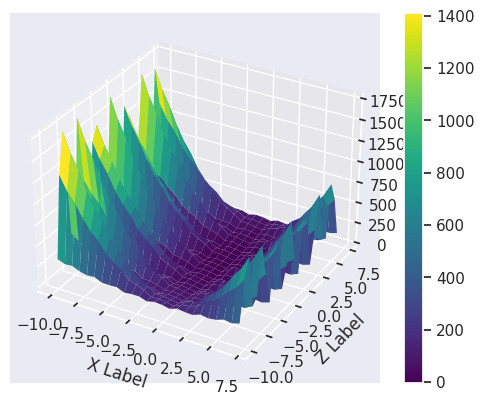

In [4]:
# Plot contour plot di sini berdasarkan range yang diberikan

x = np.linspace(-10, 7, 25) 
z = np.linspace(-10, 7, 25) 

X, Y = np.meshgrid(x, z)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f12_function(np.array([X[i, j], Y[i, j]]))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Z Label')
ax.set_zlabel('Z Label')
fig.colorbar(surf)
plt.show()

#### Latar Belakang Particle Swarm OPtimization
Particle swarm optimization di adaptasi berdasarkan kumpulan burung yang terbang dengan formasi tertentu dengan satu burung menjadi pemimpin. 

Pergerakan dari PSO pada setipa particle dari  pso di formulasikan dengan :

$$
x'_{i} = x_{i} + v_{i} 
$$

didasari dengan kecepatannya yang di formulasikan dengan:

$$
v'_{i} = v_{i} + w . x_{i} + c1 . r . (p_{best} - x_{i}) + c2 . r . (g_{best} - x_{i})
$$

<b>dimana :</b>  
<b>w : bobot </b>  
<b>r : bilangan random antara 0 -1</b>  
<b>c1 : learning rate individu</b>  
<b>c2 : learning rate sosial</b>  
<b>$p_{best}$ : titik terbaik lokal</b>  
<b>$g_{best}$ : titik terbaik global</b>


In [27]:
# PSO
# Write your code here

class PSO:
    def __init__(self, objective_function, n_particles, n_dimensions, w, c1, c2, n_iterations, upper_bound, lower_bound, seed=None):
        """
        Inisialisasi objek PSO.

        Parameters:
        - objective_function (function): Fungsi tujuan yang akan dioptimalkan.
        - n_particles (int): Jumlah partikel dalam populasi.
        - n_dimensions (int): Jumlah dimensi dalam ruang pencarian.
        - w (float): Faktor inersia.
        - c1 (float): Faktor kognitif.
        - c2 (float): Faktor sosial.
        - n_iterations (int): Jumlah iterasi.
        - upper_bound (float): Batas atas untuk nilai partikel.
        - lower_bound (float): Batas bawah untuk nilai partikel.
        - seed (int, optional): Seed untuk inisialisasi random. Default: None.
        """
        if seed is not None:
            np.random.seed(seed)
        
        self.obj_function = objective_function
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.w = w
        self.upper_bound = upper_bound
        self.lower_bound = lower_bound
        self.c1 = c1
        self.c2 = c2
        self.n_iterations = n_iterations
        self.pbest = np.zeros((n_particles, n_dimensions))
        self.gbest = np.zeros(n_dimensions)
        self.pbest_score = np.zeros(n_particles)
        self.gbest_score = math.inf
        self.particles = np.random.rand(n_particles, n_dimensions) * (self.upper_bound-self.lower_bound) + self.lower_bound
        self.velocities = np.zeros((n_particles, n_dimensions))
        self.history_particel = []
    
    def velocity(self, x):
        """
        Menghitung kecepatan partikel.

        Parameters:
        - x (ndarray): Koordinat partikel.

        Returns:
        - ndarray: Kecepatan partikel.
        """
        return self.w * x + self.c1 * np.random.rand() * (self.pbest - x) + self.c2 * np.random.rand() * (self.gbest - x)
    
    def position(self, x):
        """
        Menghitung posisi partikel.

        Parameters:
        - x (ndarray): Koordinat partikel.

        Returns:
        - ndarray: Posisi partikel.
        """
        return x + self.velocity(x)
    
    def fit(self):
        """
        Melakukan optimisasi menggunakan algoritma PSO.

        Returns:
        - ndarray: Koordinat partikel terbaik.
        """
        for i in range(self.n_iterations):
            for j in range(self.n_particles):
                score = self.obj_function(self.particles[j])
                if score < self.pbest_score[j]:
                    self.pbest_score[j] = score
                    self.pbest[j] = self.particles[j]
                if score < self.gbest_score:
                    self.gbest_score = score
                    self.gbest = self.particles[j]
            print(f"iterasi-{i+1} : global terbaik {self.gbest} score : {self.gbest_score} ")
            self.velocities = self.velocity(self.particles)
            self.particles = self.position(self.particles)
            self.history_particel.append(self.particles)
        return self.gbest
    

iterasi-1 : global terbaik [ 1.93294403 -4.94116946] score : 49.48686173736885 
iterasi-2 : global terbaik [ 0.57878673 -2.6686066 ] score : 0.40201050634181296 
iterasi-3 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-4 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-5 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-6 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-7 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-8 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-9 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-10 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-11 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-12 : global terbaik [ 0.49130227 -0.99130515] score : -13.776516220351741 
iterasi-13 : gl

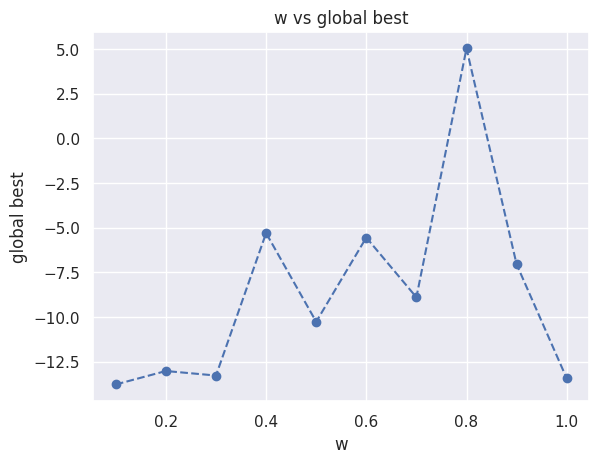

In [6]:
#w range 0.1 - 1 , c1 =1 , c2 = 1 , iterasi = 100 , partikel =10
w = [i/10 for i in range(1,11)]
hasil_w = []
for i in w:
    pso_w = PSO(f12_function,10,2,i,1,1,100,7,-10,22)
    pso_w.fit()
    hasil_w.append(pso_w.gbest_score)

#plot
plt.plot(w, hasil_w, linestyle='--', marker='o')
plt.xlabel("w")
plt.ylabel("global best")
plt.title("w vs global best")
plt.show()

iterasi-1 : global terbaik [ 1.93294403 -4.94116946] score : 49.48686173736885 
iterasi-2 : global terbaik [-0.08253836 -0.98516906] score : 5.5630962150831165 
iterasi-3 : global terbaik [-0.08253836 -0.98516906] score : 5.5630962150831165 
iterasi-4 : global terbaik [ 0.49428466 -0.86109927] score : -13.47137441727393 
iterasi-5 : global terbaik [ 0.54371313 -0.9472092 ] score : -13.559826016620981 
iterasi-6 : global terbaik [ 0.48214002 -1.02336353] score : -13.65340926060565 
iterasi-7 : global terbaik [ 0.48214002 -1.02336353] score : -13.65340926060565 
iterasi-8 : global terbaik [ 0.48214002 -1.02336353] score : -13.65340926060565 
iterasi-9 : global terbaik [ 0.48214002 -1.02336353] score : -13.65340926060565 
iterasi-10 : global terbaik [ 0.48214002 -1.02336353] score : -13.65340926060565 
iterasi-11 : global terbaik [ 0.48214002 -1.02336353] score : -13.65340926060565 
iterasi-12 : global terbaik [ 0.48214002 -1.02336353] score : -13.65340926060565 
iterasi-13 : global terba

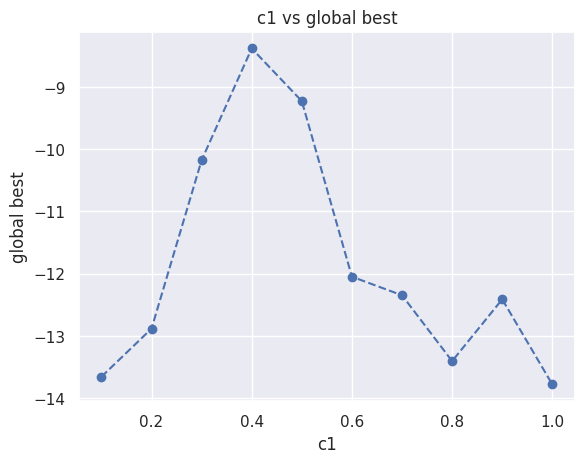

In [7]:
#c1 range 0.1 - 1 , c2 =1 , w = 0.1 , iterasi = 100 , partikel =10

c1 = [i/10 for i in range(1,11)]
hasil_c1 = []
for i in c1:
    pso_c1 = PSO(f12_function,10,2,0.1,i,1,100,7,-10, 22)
    pso_c1.fit()
    hasil_c1.append(pso_c1.gbest_score)

#plot
plt.plot(c1, hasil_c1, linestyle='--', marker='o')
plt.xlabel("c1")
plt.ylabel("global best")
plt.title("c1 vs global best")
plt.show()

iterasi-1 : global terbaik [-0.56892233  4.999665  ] score : 55.11425342417433 
iterasi-2 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-3 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-4 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-5 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-6 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-7 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-8 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-9 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-10 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-11 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-12 : global terbaik [-3.143957   -0.89280293] score : 26.867707516013443 
iterasi-13 : global terbai

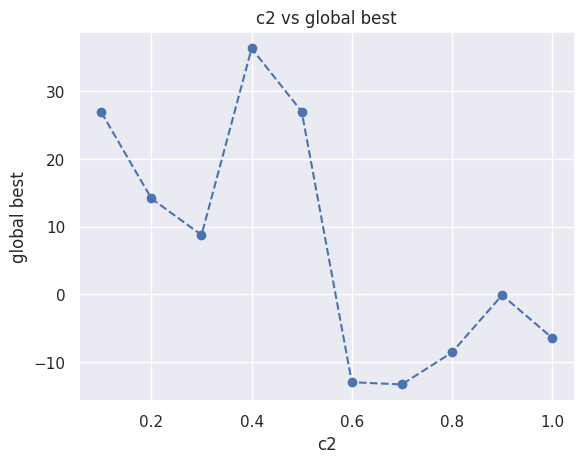

In [8]:
#c2 range 0.1 - 1 , c1 =1 , w = 0.1 , iterasi = 100 , partikel =10

c2 = [i/10 for i in range(1,11)]
hasil_c2 = []
for i in c2:
    pso_c2 = PSO(f12_function,10,2,0.4,0.2,i,100,7,-10)
    pso_c2.fit()
    hasil_c2.append(pso_c2.gbest_score)

#plot
plt.plot(c2, hasil_c2, linestyle='--', marker='o')
plt.xlabel("c2")
plt.ylabel("global best")
plt.title("c2 vs global best")
plt.show()

iterasi-1 : global terbaik [ 1.93294403 -4.94116946] score : 49.48686173736885 
iterasi-2 : global terbaik [ 0.02797863 -0.82817258] score : -0.29707329445664626 
iterasi-3 : global terbaik [ 0.54906322 -0.17811188] score : -13.664093877583303 
iterasi-4 : global terbaik [0.38822595 0.00608587] score : -14.511763145155385 
iterasi-5 : global terbaik [0.42704855 0.00669446] score : -15.009429786126526 
iterasi-6 : global terbaik [0.4697534 0.0073639] score : -15.288535991515296 
iterasi-7 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-8 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-9 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-10 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-1 : global terbaik [ 1.93294403 -4.94116946] score : 49.48686173736885 
iterasi-2 : global terbaik [ 0.02797863 -0.82817258] score : -0.29707329445664626 
iterasi-3 : global terbai

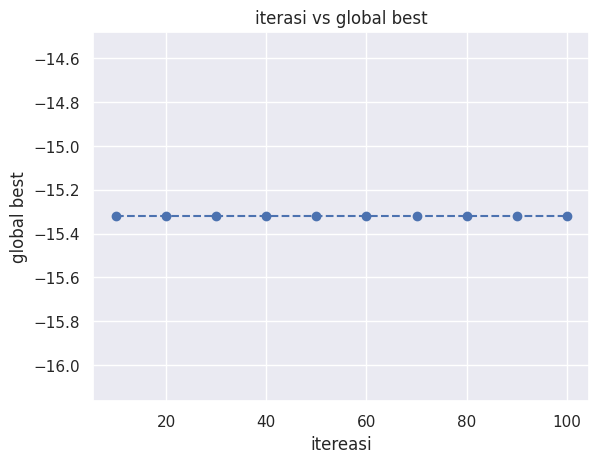

In [9]:
#w =0.1 , c1 =1 , c2 = 0.7 , iterasi 10 -100 , partikel =10
iter = [i*10 for i in range(1,11)]
hasil_iter = []

for i in iter:
    pso_iter = PSO(f12_function,10,2,0.1,1,0.7,int(i),7,-10,22)
    pso_iter.fit()
    hasil_iter.append(pso_iter.gbest_score)

#plot
plt.plot(iter, hasil_iter, linestyle='--', marker='o')
plt.xlabel("itereasi")
plt.ylabel("global best")
plt.title("iterasi vs global best")
plt.show()

iterasi-1 : global terbaik [-2.8508534   4.60609397] score : 167.1857088470399 
iterasi-2 : global terbaik [-0.01558285  1.50753022] score : 4.342735444887146 
iterasi-3 : global terbaik [0.26909621 0.55911596] score : -10.049707794893703 
iterasi-4 : global terbaik [0.29600583 0.61502756] score : -10.655076396410674 
iterasi-5 : global terbaik [0.32560641 0.67653032] score : -11.319822827510675 
iterasi-6 : global terbaik [0.35816705 0.74418335] score : -12.058461868460915 
iterasi-7 : global terbaik [0.39398376 0.81860168] score : -12.838570105731844 
iterasi-8 : global terbaik [0.43338213 0.90046185] score : -13.517314111776596 
iterasi-9 : global terbaik [0.47672035 0.99050804] score : -13.76469878358808 
iterasi-10 : global terbaik [0.47672035 0.99050804] score : -13.76469878358808 
iterasi-11 : global terbaik [0.47672035 0.99050804] score : -13.76469878358808 
iterasi-12 : global terbaik [0.47672035 0.99050804] score : -13.76469878358808 
iterasi-13 : global terbaik [0.47672035 0

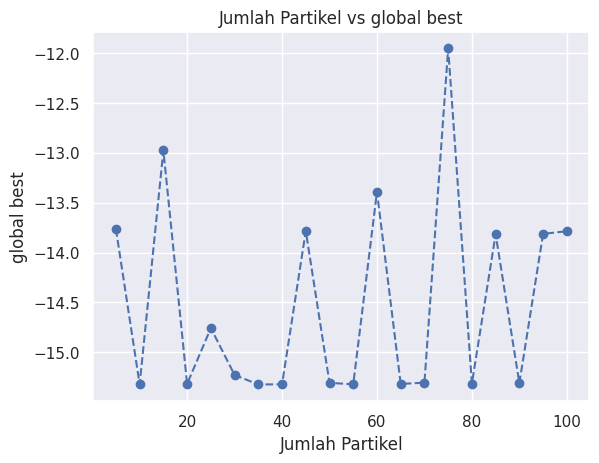

In [10]:
#w = 0.1 , c1 =1 , c2 = 0.7 , iterasi = 20, , partikel 5 -100
parti = [i*5 for i in range(1,21)]
hasil_parti = []

for i in parti:
    pso_parti = PSO(f12_function,int(i),2,0.1,1,0.7,20,7,-10,22)
    pso_parti.fit()
    hasil_parti.append(pso_parti.gbest_score)

#plot
plt.plot(parti, hasil_parti, linestyle='--', marker='o')
plt.xlabel("Jumlah Partikel")
plt.ylabel("global best")
plt.title("Jumlah Partikel vs global best")
plt.show()

#### Latar Belakang Anct Colony OPtimization (ACO)

Ant Colony Optimization (ACO) adalah algoritma optimasi yang terinspirasi oleh alam yang meniru perilaku pencarian makanan pada semut. Algoritma ini pertama kali diperkenalkan oleh Marco Dorigo dalam tesis Ph.D.-nya pada tahun 1992. Inspirasi utamanya berasal dari cara semut menemukan jalur terpendek antara sumber makanan dan sarang mereka dengan mendepositkan dan mengikuti jejak feromon.

Di alam, semut awalnya menjelajahi area di sekitar sarang mereka secara acak. Ketika mereka menemukan makanan, mereka kembali ke sarang sambil meninggalkan jejak feromon. Semut lain akan merasakan jejak feromon ini dan cenderung mengikuti jalur dengan konsentrasi feromon yang lebih kuat, sehingga memperkuat jalur yang baik. Seiring waktu, proses ini menghasilkan jalur terpendek ke sumber makanan karena semakin banyak semut yang mengikuti dan memperkuat rute terpendek.


Konsep Utama:

<ul>- Jejak Feromon: Zat kimia yang didepositkan oleh semut di tanah, yang mempengaruhi jalur yang diambil oleh semut lainnya.</ul>
<ul>- Semut Buatan: Agen dalam algoritma ACO yang meniru perilaku semut nyata, membangun solusi berdasarkan jejak feromon dan informasi heuristik spesifik masalah.</ul>
<ul>- Pembaharuan Feromon: Mekanisme untuk mensimulasikan deposisi dan penguapan feromon, yang membantu menekankan solusi yang baik dan menghapus yang buruk.</ul>



In [48]:
#ACO 
class ACO:
    def __init__(self, alpha,beta,rho,n_ants,n_iterations,n_kota, ruang_solusi, funtion_obj):
        """
        Inisialisasi objek ACO (Ant Colony Optimization).

        Parameters:
        - alpha (float): Nilai alpha untuk mengontrol pengaruh feromon.
        - beta (float): Nilai beta untuk mengontrol pengaruh jarak.
        - rho (float): Nilai rho untuk mengontrol penguapan feromon.
        - n_ants (int): Jumlah semut yang akan digunakan.
        - n_iterations (int): Jumlah iterasi yang akan dilakukan.
        - n_kota (int): Jumlah kota yang ada.
        - ruang_solusi (list): Daftar kota yang akan dijadikan ruang solusi.
        - funtion_obj (function): Fungsi objektif yang akan dioptimasi.

        Attributes:
        - alpha (float): Nilai alpha untuk mengontrol pengaruh feromon.
        - beta (float): Nilai beta untuk mengontrol pengaruh jarak.
        - rho (float): Nilai rho untuk mengontrol penguapan feromon.
        - feromon (numpy.ndarray): Matriks feromon.
        - ruang_solusi (list): Daftar kota yang akan dijadikan ruang solusi.
        - function_obj (function): Fungsi objektif yang akan dioptimasi.
        - history_path (list): Daftar path yang dilalui oleh setiap semut.
        - n_iterations (int): Jumlah iterasi yang akan dilakukan.
        - global_optimum (float): Nilai optimum global.
        - global_point (list): Titik optimum global.
        - matrix_distance (numpy.ndarray): Matriks jarak antar kota.
        - n_ants (int): Jumlah semut yang akan digunakan.
        - n_kota (int): Jumlah kota yang ada.
        """
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.feromon = np.ones((len(ruang_solusi),len(ruang_solusi)))
        self.ruang_solusi = ruang_solusi
        self.function_obj = funtion_obj
        self.history_path = [[] for _ in range(n_ants)]
        self.n_iterations = n_iterations
        self.global_optimum = math.inf
        self.global_point = None
        self.matrix_distance = self.distance()
        self.n_ants = n_ants
        self.n_kota = n_kota
    
    def distance(self):
        """
        Menghitung matriks jarak antar kota.

        Returns:
        - result (numpy.ndarray): Matriks jarak antar kota.
        """
        distance = []
        for i in range(len(self.ruang_solusi)):
            row_matrix = []
            for j in range(len(self.ruang_solusi)):
                if i !=j:
                    row_matrix.append(self.function_obj(np.array(self.ruang_solusi[j]))/self.function_obj(np.array(self.ruang_solusi[i])))
                else:
                    row_matrix.append(0)
            distance.append(row_matrix)
        
        distance_float = np.array(distance).astype(float)
        result = np.where(distance_float != 0, 1/distance_float, 0)
        
        return result
    
    def probability(self, dari,ke,feromon):
        """
        Menghitung probabilitas pemilihan kota tujuan.

        Parameters:
        - dari (int): Indeks kota asal.
        - ke (int): Indeks kota tujuan.
        - feromon (numpy.ndarray): Matriks feromon.

        Returns:
        - prob (float): Probabilitas pemilihan kota tujuan.
        """
        penyebut = sum((feromon[dari]** self.alpha)*(self.matrix_distance[dari]** self.beta))
        return ((feromon[dari,ke] ** self.alpha) * (self.matrix_distance[dari,ke] ** self.beta))/penyebut
    
    def roulette_whell(self,probs):
        """
        Memilih kota tujuan menggunakan metode roulette wheel.

        Parameters:
        - probs (dict): Dictionary probabilitas pemilihan kota tujuan.

        Returns:
        - hasil (int): Indeks kota tujuan yang terpilih.
        """
        rand = np.random.rand()
        key = [ke for ke in probs.keys()]
        cumulative_probs = [probs[k] for k in key]
        index = bisect.bisect(cumulative_probs,rand)
        if index >= len(key):
            index = len(key) - 1

        hasil = key[index]
        
        return hasil
    
    def increase_feromon(self, path):
        """
        Meningkatkan nilai feromon pada jalur yang dilalui oleh setiap semut.

        Parameters:
        - path (list): Daftar path yang dilalui oleh setiap semut.
        """
        for pth in path:
            for i in range(len(pth)-1):
                self.feromon[pth[i],pth[i+1]] += 1/self.function_obj(np.array(self.ruang_solusi[i]))
    
    def decrease_feromon(self):
        """
        Mengurangi nilai feromon pada seluruh matriks feromon.
        """
        for i in range(len(self.feromon)):
            for j in range(len(self.feromon)):
                self.feromon[i,j] = (1-self.rho)*self.feromon[i,j]
    
    def fit(self):
        """
        Melakukan proses optimisasi menggunakan algoritma ACO.
        """
        for i in range(self.n_iterations):
            posisi_0 = np.random.choice(len(self.ruang_solusi))
            hist_Path = []
            for sem in range(self.n_ants):
                semut_path = [posisi_0]
                dari = posisi_0
                kota_visit = [dari]
                feromon_individu = self.feromon.copy()
                for _ in range(self.n_kota):
                    self.history_path[sem].append(self.ruang_solusi[dari])
                    for vis in kota_visit:
                        feromon_individu[dari,vis] = 0
                    proba = 0
                    probs = {}
                    for  tuju in range(len(self.ruang_solusi)):
                        if tuju  != dari:
                            proba += self.probability(dari,tuju,feromon_individu)
                            probs[tuju] = proba
                        
                    ke = self.roulette_whell(probs)
                    while ke in kota_visit:
                        ke = self.roulette_whell(probs)
                    
                    #if self.function_obj(np.array(self.ruang_solusi[ke])) < self.function_obj(np.array(self.ruang_solusi[dari])):
                    kota_visit.append(ke)
                    semut_path.append(ke)
                    dari = ke
                hist_Path.append(semut_path)
            self.decrease_feromon()
            self.increase_feromon(hist_Path)
            
            for pos in  hist_Path:
                score = self.function_obj(np.array(self.ruang_solusi[pos[-1]]))
                if score < self.global_optimum:
                    self.global_optimum = score
                    self.global_point = self.ruang_solusi[pos[-1]]
            
            print(f'Iterasi - {i+1} : global optimum {self.global_point} score : {self.global_optimum}')
            
                    
                
                
                
                
    
    
    
        

In [22]:
x_1 = [i for i in range(-10,8)]
x_2 = x_1
ruang_solusi = [[i,j] for i in x_1 for j in x_2]

0.1


/tmp/ipykernel_81256/1928000507.py:64: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [3, 4] score : 39.2699081698724
Iterasi - 2 : global optimum [3, 1] score : 15.707963267948957
Iterasi - 3 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 4 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 5 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 6 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 7 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 8 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 9 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 10 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 11 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 12 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 13 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 14 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 15 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 16 : global optimum [1, -2] score : 7.853

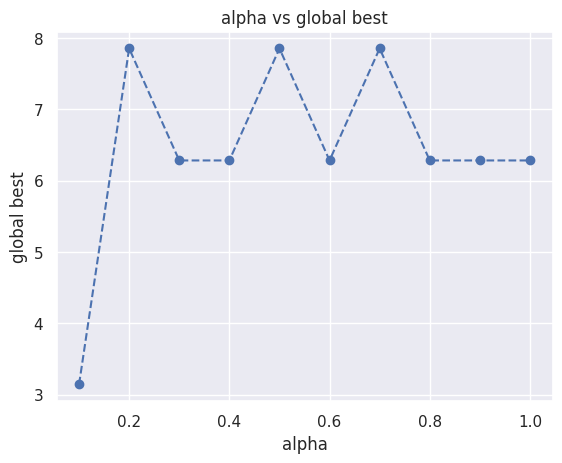

In [30]:
#alpha range 0.1 - 1 , beta =1 , rho = 0.5 , n_ants = 10 ,iterasi = 20 , n_CITY = 100
alpha = [i/10 for i in range(1,11)]
hasil_alpha = []
for i in alpha:
    print(i)
    aco_alpha= ACO(i,1,0.5,10,20,100,ruang_solusi,f12_function)
    aco_alpha.fit()
    print('a')
    hasil_alpha.append(aco_alpha.global_optimum)

#plot
plt.plot(alpha, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("alpha")
plt.ylabel("global best")
plt.title("alpha vs global best")
plt.show()



0.1


/tmp/ipykernel_81256/516858114.py:64: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [-5, -3] score : 53.40707511102649
Iterasi - 2 : global optimum [-1, -1] score : 3.141592653589793
Iterasi - 3 : global optimum [-1, -1] score : 3.141592653589793
Iterasi - 4 : global optimum [-1, -1] score : 3.141592653589793
Iterasi - 5 : global optimum [-1, -1] score : 3.141592653589793
Iterasi - 6 : global optimum [1, 1] score : 3.141592653589789
Iterasi - 7 : global optimum [1, 1] score : 3.141592653589789
Iterasi - 8 : global optimum [1, 1] score : 3.141592653589789
Iterasi - 9 : global optimum [1, 1] score : 3.141592653589789
Iterasi - 10 : global optimum [1, 1] score : 3.141592653589789
Iterasi - 11 : global optimum [1, 1] score : 3.141592653589789
Iterasi - 12 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 13 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 14 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 15 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 16 : global optimum [0, 1] score : 1.570

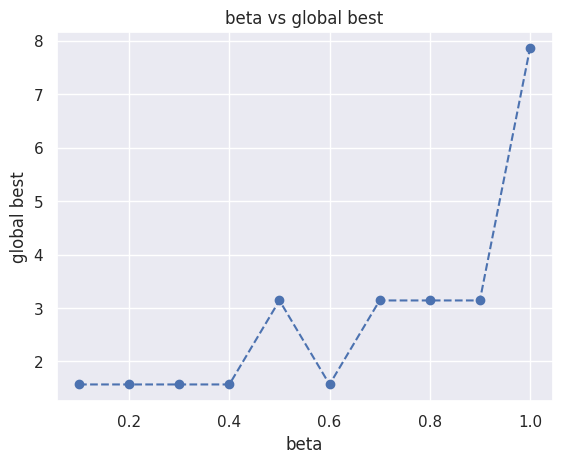

In [38]:
#alpha =0.1  , beta 0.1-1 , rho = 0.5 , n_ants = 10 ,iterasi = 20 , n_CITY = 100
beta = [i/10 for i in range(1,11)]
hasil_alpha = []
for i in alpha:
    print(i)
    aco_alpha= ACO(0.1,i,0.5,10,20,100,ruang_solusi,f12_function)
    aco_alpha.fit()
    print('a')
    hasil_alpha.append(aco_alpha.global_optimum)

#plot
plt.plot(alpha, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("beta")
plt.ylabel("global best")
plt.title("beta vs global best")
plt.show()



/tmp/ipykernel_81256/516858114.py:64: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [-1, -4] score : 26.703537555513243
Iterasi - 2 : global optimum [0, -2] score : 6.283185307179588
Iterasi - 3 : global optimum [0, -2] score : 6.283185307179588
Iterasi - 4 : global optimum [0, -2] score : 6.283185307179588
Iterasi - 5 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 6 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 7 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 8 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 9 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 10 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 11 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 12 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 13 : global optimum [1, -1] score : 3.141592653589789
Iterasi - 14 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 15 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 16 : global optimum [0, 1] score : 1.

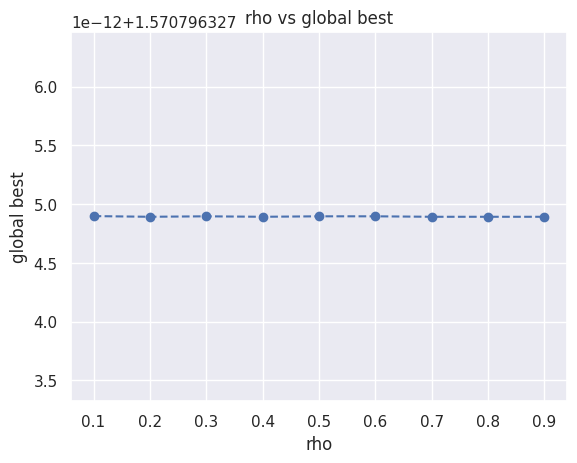

In [39]:
#alpha =0.1  , beta = 0.1 , rho = 0.1-0.9 , n_ants = 10 ,iterasi = 20 , n_CITY = 100
beta = [i/10 for i in range(1,10)]
hasil_alpha = []
for i in beta:
    
    aco_alpha= ACO(0.1,0.1,i,10,20,100,ruang_solusi,f12_function)
    aco_alpha.fit()
    
    hasil_alpha.append(aco_alpha.global_optimum)

#plot
plt.plot(beta, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("rho")
plt.ylabel("global best")
plt.title("rho vs global best")
plt.show()



/tmp/ipykernel_81256/516858114.py:64: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 2 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 3 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 4 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 5 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 6 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 7 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 8 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 9 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 10 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 11 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 12 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 13 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 14 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 15 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 16 : global optimum [1, 0] score : 1.57

ValueError: x and y must have same first dimension, but have shapes (9,) and (19,)

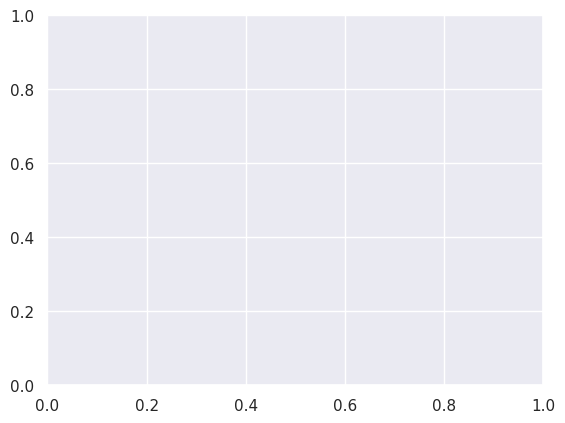

In [40]:
#alpha =0.1  , beta = 0.1 , rho = 0.1 , n_ants = 2-20 ,iterasi = 20 , n_CITY = 100
n_ants = [i for i in range(2,21)]
hasil_alpha = []
for i in n_ants:
    
    aco_alpha= ACO(0.1,0.1,0.1,i,20,100,ruang_solusi,f12_function)
    aco_alpha.fit()
    
    hasil_alpha.append(aco_alpha.global_optimum)

#plot
plt.plot(beta, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("n_ants")
plt.ylabel("global best")
plt.title("n_ants vs global best")
plt.show()



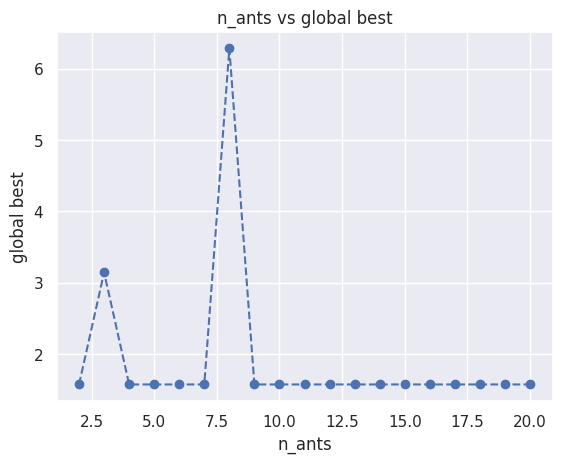

In [41]:
plt.plot(n_ants, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("n_ants")
plt.ylabel("global best")
plt.title("n_ants vs global best")
plt.show()

/tmp/ipykernel_81256/516858114.py:64: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 2 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 3 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 4 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 5 : global optimum [1, 0] score : 1.5707963267948928
Iterasi - 1 : global optimum [-1, -3] score : 15.707963267948966
Iterasi - 2 : global optimum [-1, -3] score : 15.707963267948966
Iterasi - 3 : global optimum [-1, -3] score : 15.707963267948966
Iterasi - 4 : global optimum [-1, -3] score : 15.707963267948966
Iterasi - 5 : global optimum [-1, -3] score : 15.707963267948966
Iterasi - 6 : global optimum [-1, -3] score : 15.707963267948966
Iterasi - 1 : global optimum [2, 3] score : 20.42035224833366
Iterasi - 2 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 3 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 4 : global optimum [1, -2] score : 7.853981633974478
Iterasi - 5 : global optimum [1, -2] score :

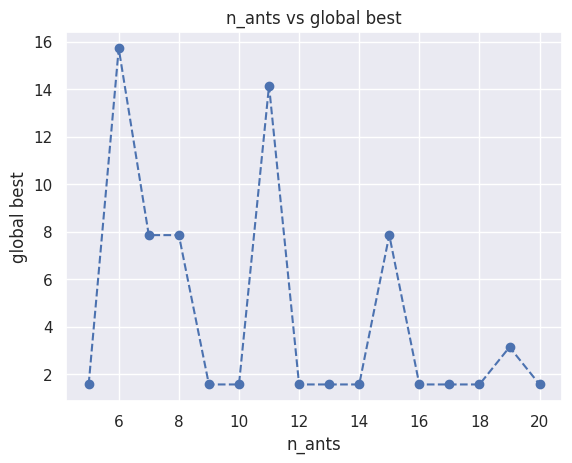

In [42]:
#alpha =0.1  , beta = 0.1 , rho = 0.1 , n_ants = 5 ,iterasi = 5 -20 , n_CITY = 100
iterasi = [i for i in range(5,21)]
hasil_alpha = []
for i in iterasi:
    
    aco_alpha= ACO(0.1,0.1,0.1,5,int(i),100,ruang_solusi,f12_function)
    aco_alpha.fit()
    
    hasil_alpha.append(aco_alpha.global_optimum)

#plot
plt.plot(iterasi, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("n_ants")
plt.ylabel("global best")
plt.title("n_ants vs global best")
plt.show()

/tmp/ipykernel_81256/516858114.py:64: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 2 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 3 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 4 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 1 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 2 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 3 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 4 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global opti

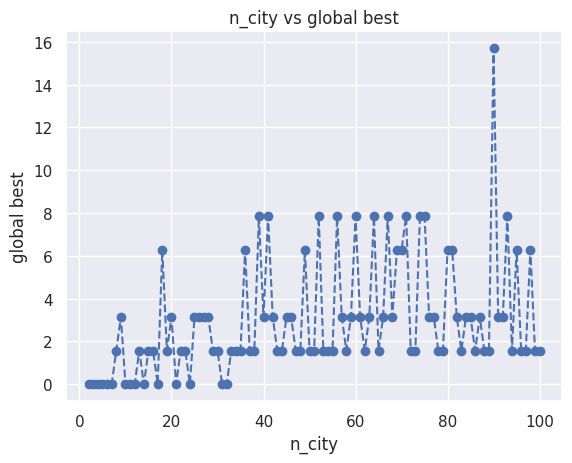

In [45]:
#alpha =0.1  , beta = 0.1 , rho = 0.1 , n_ants = 5 ,iterasi = 9 , n_CITY = 2-100
n_city = [i for i in range(2,101)]
hasil_alpha = []
for i in n_city:
    
    aco_alpha= ACO(0.1,0.1,0.1,5,9,int(i),ruang_solusi,f12_function)
    aco_alpha.fit()
    
    hasil_alpha.append(aco_alpha.global_optimum)

#plot
plt.plot(n_city, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("n_city")
plt.ylabel("global best")
plt.title("n_city vs global best")
plt.show()

#### Running PSO
parameter optimal pso  
c1 : 1  
c2 : 0.7  
w : 0.1  
iterasi : 20  
jumlah partikel :10  

nilai-nilai hyperparameter untuk pso di dapatkan dari hasil eksperimen sebelumnya. Pada grafik-grafik yang menampilkan perbandingan pada masing-masing hyperparameter dengan nilai fitnessnya, didapatkan pada nilai-nilai tersebut titik paling optimal dibandingkan titik-titik lainnya. 

pengujian pada mulanya merubah bobot pada range 0.1-1 dengan c1, c2 iterasi dan jumlah partikel dibuat tetap. lalu setelah di dapat nilai w optimal, lalu selanjutnya c1 ri uji pada range yang sama dengan parameter lain dibuat tetap. Begitu seterusnya untuk parameter-parameter lainnya. Terkhusus untuk iterasi range uji dari 5 -100 dengan step 5 dan jumlah partikel dari 5 -100 dengan step 5 juga. 

In [28]:
# Run PSO
# Write your code here

ps = PSO(f12_function,10,2,0.1,1,0.7,20,7,-10,22)
ps.fit()

iterasi-1 : global terbaik [ 1.93294403 -4.94116946] score : 49.48686173736885 
iterasi-2 : global terbaik [ 0.02797863 -0.82817258] score : -0.29707329445664626 
iterasi-3 : global terbaik [ 0.54906322 -0.17811188] score : -13.664093877583303 
iterasi-4 : global terbaik [0.38822595 0.00608587] score : -14.511763145155385 
iterasi-5 : global terbaik [0.42704855 0.00669446] score : -15.009429786126526 
iterasi-6 : global terbaik [0.4697534 0.0073639] score : -15.288535991515296 
iterasi-7 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-8 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-9 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-10 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-11 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-12 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-13 : global te

array([ 0.49317891, -0.00365965])

iterasi-1 : global terbaik [ 1.93294403 -4.94116946] score : 49.48686173736885 
iterasi-2 : global terbaik [ 0.02797863 -0.82817258] score : -0.29707329445664626 
iterasi-3 : global terbaik [ 0.54906322 -0.17811188] score : -13.664093877583303 
iterasi-4 : global terbaik [0.38822595 0.00608587] score : -14.511763145155385 
iterasi-5 : global terbaik [0.42704855 0.00669446] score : -15.009429786126526 
iterasi-6 : global terbaik [0.4697534 0.0073639] score : -15.288535991515296 
iterasi-7 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-8 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-9 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-10 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-11 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-12 : global terbaik [ 0.49317891 -0.00365965] score : -15.321773153924036 
iterasi-13 : global te

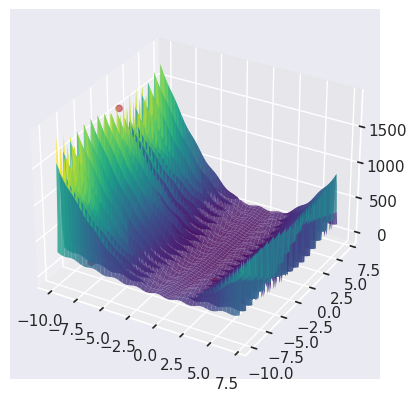

In [29]:
# Plot hasil running PSO  secara interaktif
#untuk bisa running lebih baik silahkan buka url : 

x = np.linspace(-10, 7, 100)
y = np.linspace(-10, 7, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f12_function(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
pso3 = PSO(f12_function,10,2,0.1,1,0.7,20,7,-10,22)
points = ax.scatter(pso3.particles[:, 0], pso3.particles[:, 1], [f12_function(p) for p in pso3.particles], color='r')
pso3.fit()
list_poin = pso3.history_particel


def update(frame):
    titik_poin = list_poin[frame]
    print(titik_poin)
    points._offsets3d = (titik_poin[:, 0], titik_poin[:, 1], [f12_function(p) for p in titik_poin])
    return points,

ani = FuncAnimation(fig, update, frames=np.arange(len(list_poin)), interval=100,)
plt.show()

#### Running ACO

parameter optimal ACO  
alpha : 0.1  
beta : 0.1  
rho : 0.1  
iterasi : 9 
n_ants :5 
n_city : 4

nilai-nilai hyperparameter untuk aco di dapatkan dari hasil eksperimen sebelumnya. Pada grafik-grafik yang menampilkan perbandingan pada masing-masing hyperparameter dengan nilai fitnessnya, didapatkan pada nilai-nilai tersebut titik paling optimal dibandingkan titik-titik lainnya. 

pengujian pada mulanya merubah alpha pada range 0.1-1 dengan beta,rho iterasi, jumlah semut dan jumlah kota dibuat tetap. lalu setelah di dapat nilai alpha optimal, lalu selanjutnya beta di uji pada range yang sama dengan parameter lain dibuat tetap. Begitu seterusnya untuk parameter-parameter lainnya. Terkhusus untuk iterasi range uji dari 2 -20 , jumlah kota  dari 2 -100 dan jumlah semut dari 2-20. 

In [46]:
# Run ACO
# Write your code here

aco = ACO(0.1,0.1,0.1,5,9,4,ruang_solusi,f12_function)
aco.fit()

/tmp/ipykernel_81256/516858114.py:64: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [-2, 2] score : 12.566370614359169
Iterasi - 2 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 3 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 4 : global optimum [0, 1] score : 1.5707963267948986
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15


/tmp/ipykernel_81256/516858114.py:64: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [-4, 0] score : 25.132741228718338
Iterasi - 2 : global optimum [-4, 0] score : 25.132741228718338
Iterasi - 3 : global optimum [-2, 0] score : 6.2831853071795845
Iterasi - 4 : global optimum [-2, 0] score : 6.2831853071795845
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15


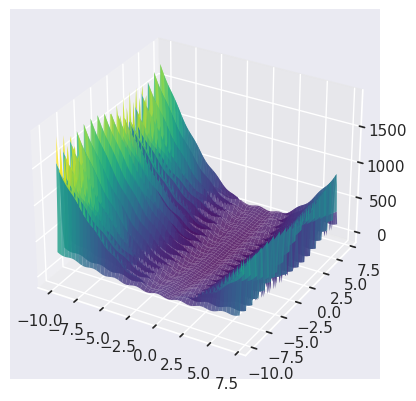

In [50]:
# Plot hasil running algoritma 2 secara interaktif

#animasi ACO
x = np.linspace(-10, 7, 100)
y = np.linspace(-10, 7, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f12_function(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
aco3= ACO(0.1,0.1,0.1,5,9,4,ruang_solusi,f12_function)
aco3.fit()
semut_list = [[j[i]for j in aco3.history_path] for i in range(len(aco3.history_path[0]) )]
semut_array = np.array(semut_list)
points = ax.scatter(semut_array[0][:, 0], semut_array[0][:, 1], [f12_function(p) for p in semut_array[0]], color='r')



def update2(frame):
    titik_poin = semut_array[frame]
    print(titik_poin)
    points._offsets3d = (titik_poin[:, 0], titik_poin[:, 1], [f12_function(p) for p in titik_poin])
    return points,

ani = FuncAnimation(fig, update2, frames=np.arange(len(semut_array)), interval=100,)
plt.show()

#### Hasil dan Analisis
Hasil PSO menunjukan titil optimal nya adalah 0.49317891, -0.00365965  dengan score : -15.321773153924036 membutuhkkan 20 iterasi
sedang kan ACO menunjukan titik optimalnya adalah titik 0,0 dengan score 1.92367069372179e-15 membutuhkan 9 iterasi

secara score atau nilai fitness PSO menunjukan nilai yang lebih optimal, karena memang PSO bermain pada ranah bilangan real atau kontinyu sehingga eksplorasi pada ruang solusi bisa lebih luas. Sedangkan pada ACO karena bermain pada ranah bilangan bulat atau integer , eksplorasi tidak bisa sedetail pada PSO, 

namun dari sisi komputasi ACO bisa lebih efisien dengan nilai optimal atau titik optimal yang tidak begitu jauh dengan pengunaan PSO 



#### Kesimpulan

Kesimpulannya adalah dari sisi nilai optimal PSO sedikit lebih baik dari ACO , sedangkan jika sumberdaya terbatas maka pengunaan ACO akan lebih baik, karena lebih efisien dari segi komputasi dan nilai optimal yang tidak begitu jauh dari PSO 